### Import Libraries & Functions

In [215]:
%run Libraries.ipynb

In [41]:
class ObjectOrientedPorto:
    """
    Create instance by merging train and test
    """
    def __init__(self,train,test):
        print('Object Oriented Instance Created')
        self.y_train=train['target']
        self.x_train=train.drop('target',axis=1)
        self.x_test=test
        print("Train Size{}".format(train.shape))
        print("Test Size{}".format(test.shape))

        
        
    def merge_train_test(self):
        """
        merge train and test to a DF to do basic Descriptive Stats analysis
        """
        merged_data=pd.concat([self.x_train,self.x_test],axis=0)
        merged_data.reset_index(drop=True,inplace=True)
        print("Data Merged. Total Rows {}".format(merged_data.shape))
        return merged_data
    
    
    def _info(self,data):
        """
        prepare meta data
        """
        local_merged_data=data
        
        level=[]
        for feature in local_merged_data.columns:
            if 'cat' in feature or feature=='id':
                level.append('nominal')
            elif 'bin' in feature:
                level.append('binary')
            elif local_merged_data[feature].dtypes=='int64':
                level.append('ordinal')
            elif local_merged_data[feature].dtypes=='float64':
                level.append('interval')
                
        meta=pd.DataFrame(level,columns=['level'])
        meta['role']=['id' if feature=='id' else 'input' for feature in local_merged_data.columns]
        meta.index=local_merged_data.columns
        meta['keep']=True        
        meta['dtype']=[local_merged_data[feature].dtype for feature in local_merged_data.columns]
        meta['Missing_Count']=list(map(lambda x: sum(local_merged_data[x]==-1),local_merged_data.columns))
        meta['Missing_Percent']=round(meta['Missing_Count']*100/local_merged_data.shape[0],2)
        meta.loc[meta['Missing_Percent']>25, 'keep']=False
        meta.loc['id','keep']=False
        return meta                
                
                
    def describe_data(self,data,meta_data,var_type):
        """
        this output will help us understand the range,variance and if scaling is needed etc.
        Var_type can be interval, ordinal or nominal
        """
        temp=meta_data[(meta_data.level==var_type) & (meta_data.keep)].index
        print("{} Variable".format(var_type))
        print("=======================")
        return(data[temp].describe())                

### Exploratory Data Analysis

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [42]:
%%time
porto_instance=ObjectOrientedPorto(train,test)
all_data=porto_instance.merge_train_test()

Object Oriented Instance Created
Train Size(595212, 59)
Test Size(892816, 58)
Data Merged. Total Rows (1488028, 58)
Wall time: 2.37 s


In [43]:
#Add a new column. i.e total number of NA per ID variable. This is part of Feature Engineering
all_data['NA_count']=np.sum(all_data.apply(lambda x:x==-1),axis=1)

In [44]:
%%time
meta_data=porto_instance._info(all_data)
print(meta_data.tail())

                  level   role  keep  dtype  Missing_Count  Missing_Percent
ps_calc_17_bin   binary  input  True  int64              0              0.0
ps_calc_18_bin   binary  input  True  int64              0              0.0
ps_calc_19_bin   binary  input  True  int64              0              0.0
ps_calc_20_bin   binary  input  True  int64              0              0.0
NA_count        ordinal  input  True  int64              0              0.0
Wall time: 3.67 s


In [45]:
porto_instance.describe_data(all_data,meta_data,"interval")

interval Variable


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,6.110305e-01,4.395943e-01,5.514848e-01,3.799519e-01,8.134878e-01,2.763614e-01,3.067355e+00,4.496817e-01,4.501073e-01,4.499718e-01
std,2.876763e-01,4.045123e-01,7.938159e-01,5.836187e-02,2.247024e-01,3.569623e-01,7.299510e-01,2.872071e-01,2.871817e-01,2.872136e-01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.506191e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e-01,2.000000e-01,5.250000e-01,3.162278e-01,6.710052e-01,3.339162e-01,2.828427e+00,2.000000e-01,2.000000e-01,2.000000e-01
50%,7.000000e-01,3.000000e-01,7.211103e-01,3.741657e-01,7.660406e-01,3.687818e-01,3.316625e+00,4.000000e-01,5.000000e-01,5.000000e-01
75%,9.000000e-01,6.000000e-01,1.001561e+00,4.000000e-01,9.061429e-01,3.964846e-01,3.605551e+00,7.000000e-01,7.000000e-01,7.000000e-01
max,9.000000e-01,1.800000e+00,4.423517e+00,1.264911e+00,4.031301e+00,6.363961e-01,3.741657e+00,9.000000e-01,9.000000e-01,9.000000e-01


In [142]:
#porto_instance.describe_data(all_data,meta_data,"nominal") since describe for nominal variable will not amke sense

In [47]:
porto_instance.describe_data(all_data,meta_data,"ordinal")

ordinal Variable


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,NA_count
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,1.901574e+00,4.417567e+00,1.241038e-02,7.298086e+00,2.346392e+00,2.371666e+00,1.885551e+00,7.688461e+00,3.008052e+00,9.225874e+00,2.338736e+00,8.439336e+00,5.439640e+00,1.440927e+00,2.873923e+00,7.539831e+00,1.422522e+00
std,1.985417e+00,2.700054e+00,1.273684e-01,3.543585e+00,8.320187e-01,1.117059e+00,1.136029e+00,1.333837e+00,1.414919e+00,1.460205e+00,1.247940e+00,2.905658e+00,2.331197e+00,1.201557e+00,1.694398e+00,2.746189e+00,9.399471e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00
50%,1.000000e+00,4.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,2.000000e+00,8.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00
75%,3.000000e+00,6.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00,4.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,7.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,2.000000e+00
max,7.000000e+00,1.100000e+01,4.000000e+00,1.300000e+01,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,9.000000e+00,1.200000e+01,7.000000e+00,2.500000e+01,2.000000e+01,1.100000e+01,1.500000e+01,2.800000e+01,8.000000e+00


In [48]:
class Preprocess():
    
    def __init__(self,all_data,val_size=None):
        print("Preprocess Object Created")
        self.all_data=all_data
        if val_size==None:
            self.val_size=0.3
        else:
            self.val_size=val_size            
          
    
    def _get_train_test_val_split(self):
        """
        return a dic with keys X_train,y_train,X_val,y_val,X_test
        """
        all_data_local=self.all_data
        data_dic={}
        train_data=all_data_local.head(train.shape[0])
        test_data=all_data_local.tail(test.shape[0])
        X_train, X_val,y_train, y_val=train_test_split(train_data,train['target'],test_size=self.val_size,random_state=1)
        data_dic['X_train']=X_train
        data_dic['X_val']=X_val
        data_dic['y_train']=y_train
        data_dic['y_val']=y_val
        data_dic['X_test']=test_data
        return data_dic
    
        
    def fillna(self,data_dic,meta_data):
        """
        #input- 1)dic with train,val and test data 2) meta data
        
        Keep nominal variables with NA as is (-1)
        Replace interval variables with NA by median
        Replace ordinal variables with NA by mode
        
        #output- 1)returns the dictionary(as input) back after imputing the Nulls
                 2) meta data after updating of MissingCount and MissingPercent columns
        
        """
        info=meta_data
        get_data=data_dic
        
        interval_features=(info [(info['keep'])&(info['Missing_Count']>0)& (info['level']=='interval')]).index
        ordinal_features=(info [(info['keep'])&(info['Missing_Count']>0)& (info['level']=='ordinal')]).index

        for i in interval_features:
            get_data['X_train'][i]=get_data['X_train'][i].replace(-1,get_data['X_train'][i].median())
            get_data['X_val'][i]=get_data['X_val'][i].replace(-1,get_data['X_train'][i].median())
            get_data['X_test'][i]=get_data['X_test'][i].replace(-1,get_data['X_train'][i].median())
            info.loc[i,['Missing_Count','Missing_Percent']]=0
        
        for j in ordinal_features:
            get_data['X_train'][j]=get_data['X_train'][i].replace(-1,get_data['X_train'][i].mode()[0])
            get_data['X_val'][j]=get_data['X_val'][i].replace(-1,get_data['X_train'][i].mode()[0])
            get_data['X_test'][j]=get_data['X_test'][i].replace(-1,get_data['X_train'][i].mode()[0])
            info.loc[j,['Missing_Count','Missing_Percent']]=0
            
        return (get_data,info)

    
            
    def check_cardinality(self,data_dic,meta_data):
        """
        #input - 1)dic with train,val and test data 2) meta data
        Gives the number of distict levels for each categorical variable
        #output- prints each nominal variables and the count of cardinalities within train data
        """
        info=meta_data
        nominal_features=(info [(info['keep'])& (info['level']=='nominal')]).index
        train_data=data_dic['X_train']
        
        for i in nominal_features:
            print('variable {} has {} distinct levels'.format(i,train_data[i].value_counts().shape[0]))
            
    def fix_cardinality(self,data_dic,meta_data,column_name):
        """
        #input - 1)dic with train,val and test data 2) meta data 3) Column name ( cardinality will be fixed for this)
         fix cardinality for a COLUMN ( variable that has too many dictinct levels). By P(1) 
        for that level or apriori if the level doesnot exist. This will give 3 series as output.
        Add them then to the data ( train, val, test ) with post script _TE ( target encoded )
        #output- 1) dic as the input but with cardinality replaced by Probability
                 2) meta data after updation ( keep False for the original column)
        """
        data=data_dic
        info=meta_data
        train_encoded,val_encoded, test_encoded= target_encode(data['X_train'][column_name],\
                                                               data['X_val'][column_name],data['X_test'][column_name],\
                                                               target=data['y_train'])        
        data['X_train'][column_name+'_TE']=train_encoded
        data['X_val'][column_name+'_TE']=val_encoded
        data['X_test'][column_name+'_TE']=test_encoded
        #update the meta data
        info.loc[column_name,'keep']=False        
        return (data,info)

In [56]:
preprocess_instance=Preprocess(all_data,0.40)
all_data_dic=preprocess_instance._get_train_test_val_split()

Preprocess Object Created


In [57]:
all_data_dic_imputed,meta_data_imputed=preprocess_instance.fillna(all_data_dic,meta_data)

In [58]:
preprocess_instance.check_cardinality(all_data_dic_imputed,meta_data_imputed)

variable ps_ind_02_cat has 5 distinct levels
variable ps_ind_04_cat has 3 distinct levels
variable ps_ind_05_cat has 8 distinct levels
variable ps_car_01_cat has 13 distinct levels
variable ps_car_02_cat has 3 distinct levels
variable ps_car_04_cat has 10 distinct levels
variable ps_car_06_cat has 18 distinct levels
variable ps_car_07_cat has 3 distinct levels
variable ps_car_08_cat has 2 distinct levels
variable ps_car_09_cat has 6 distinct levels
variable ps_car_10_cat has 3 distinct levels
variable ps_car_11_cat has 104 distinct levels


In [59]:
all_data_dic_imputed_TE,meta_data_imputed_TE  = preprocess_instance.fix_cardinality(all_data_dic,meta_data,'ps_car_11_cat')

In [61]:
meta_data_imputed_TE.head()

,level,role,keep,dtype,Missing_Count,Missing_Percent
id,nominal,id,False,int64,0,0.00
ps_ind_01,ordinal,input,True,int64,0,0.00
ps_ind_02_cat,nominal,input,True,int64,523,0.04
ps_ind_03,ordinal,input,True,int64,0,0.00
ps_ind_04_cat,nominal,input,True,int64,228,0.02


### Data Visualization

In [79]:
class Visualize:
    
    def __init__(self,data,meta_data):
        self.data=data
        self.meta_data=meta_data
        self.train=pd.concat([self.data['X_train'],self.data['y_train']],axis=1)
        
    def barplots(self):
        """
        plots for each level of a nominal variable wrt the target variable 
        """
        nominal_vars=self.meta_data[(self.meta_data.level=='nominal') & (self.meta_data.keep==True)].index
        
        for f in nominal_vars:
            plt.figure()
            fig, ax = plt.subplots(figsize=(5,3))
            # Calculate the percentage of target=1 per category value
            cat_perc = self.train[[f, 'target']].groupby([f],as_index=False).mean()
            cat_perc.sort_values(by='target', ascending=False, inplace=True)
            # Bar plot
            # Order the bars descending on target mean
            sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
            plt.ylabel('% target', fontsize=18)
            plt.xlabel(f, fontsize=18)
            plt.tick_params(axis='both', which='major', labelsize=18)
            plt.show();
            
            
    def corplots(self,var):
        """
        input- 1) Interval or Ordinal
        plots for interval variables / ordinal variables 
        """        
        if var=='interval':
            vars=self.meta_data[(self.meta_data.level==var) & (self.meta_data.keep==True)].index #interval_
        else:
            vars=self.meta_data[(self.meta_data.level==var) & (self.meta_data.keep==True)].index #ordinal_
            
        data=self.data['X_train']
        
        plt.subplots(figsize=(10,7))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(self.train[vars].corr(),annot=True,fmt='.2f',cmap=cmap);

<Figure size 432x288 with 0 Axes>

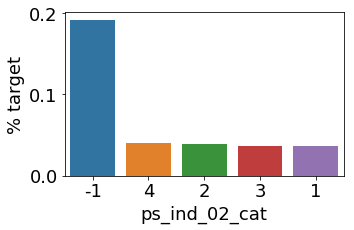

<Figure size 432x288 with 0 Axes>

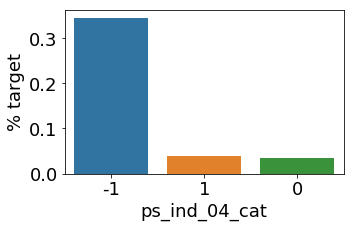

<Figure size 432x288 with 0 Axes>

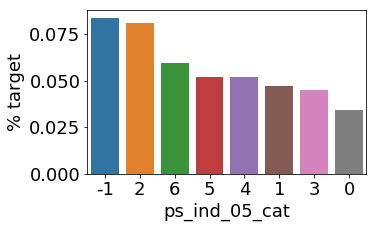

<Figure size 432x288 with 0 Axes>

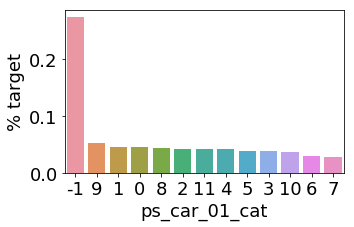

<Figure size 432x288 with 0 Axes>

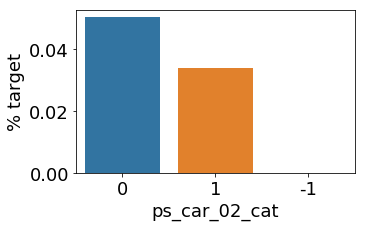

<Figure size 432x288 with 0 Axes>

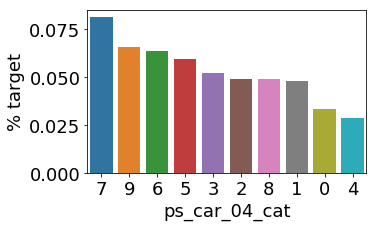

<Figure size 432x288 with 0 Axes>

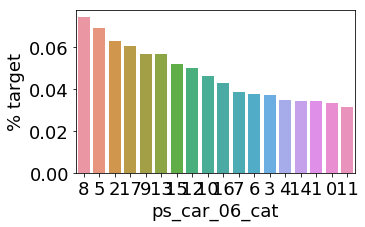

<Figure size 432x288 with 0 Axes>

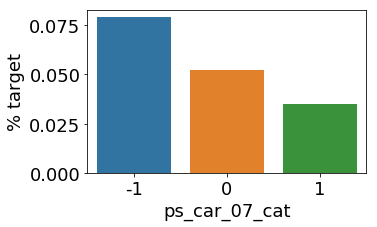

<Figure size 432x288 with 0 Axes>

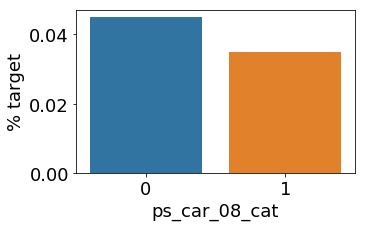

<Figure size 432x288 with 0 Axes>

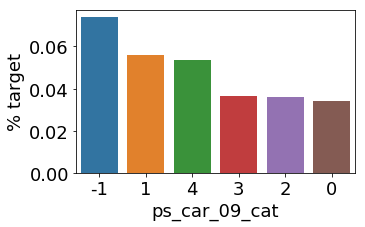

<Figure size 432x288 with 0 Axes>

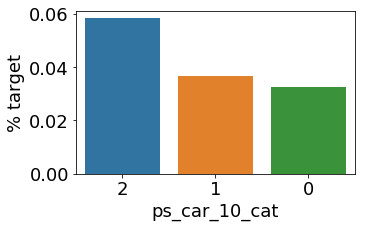

In [80]:
viz=Visualize(all_data_dic_imputed_TE,meta_data_imputed_TE)
viz.barplots(); #nominal variables

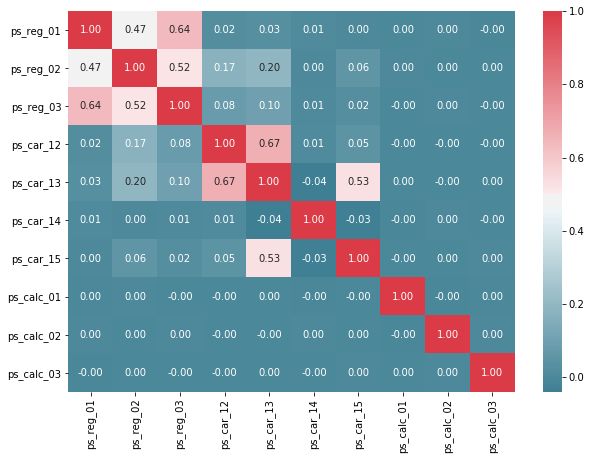

In [81]:
viz.corplots('interval')

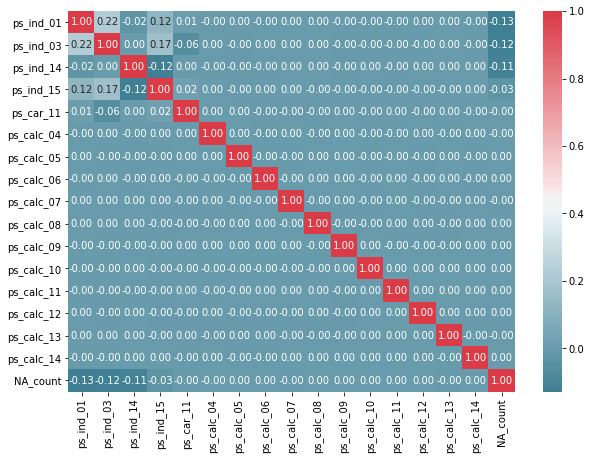

In [82]:
viz.corplots('ordinal')

### Feature Engineering

In [84]:
class feature_engineering:
    def __init__(self,meta): 
        self.meta_data=meta
    
    def merge_data(self,data):
        """
        Merges the data ( which was a dic) into a DF
        """
        self.data=data
        self.data['X_train']['data']='train'
        self.data['X_train']['target']=data['y_train']
        self.data['X_val']['data']='val'
        self.data['X_val']['target']=data['y_val']
        self.data['X_test']['data']='test'
        self.data['X_test']['target']=-1
        all_data=pd.concat([self.data['X_train'],self.data['X_val'],self.data['X_test']],axis=0)
        all_data.reset_index(drop=True,inplace=True)
        return all_data
    
        
    def create_dummies(self,data):
        """
        input-> merged data(as a df)
        """
        data=data
        nominal_variables= self.meta_data[(self.meta_data.level == 'nominal') & (self.meta_data.keep)].index
        print('Before creating dummies- Total variables: {}'.format(data.shape[1]))
        data=pd.get_dummies(data, columns=nominal_variables, drop_first=True)
        print('After creating dummies- Total variables: {}'.format(data.shape[1]))
        return data
    
    def interaction_vars(self,data_with_dummies,degree=2):
        """
        interaction of all interval variables. data_with_dummies(DF) & Degree as input
        """
        data=data_with_dummies        
        interval_varaibles=self.meta_data[(self.meta_data.level == 'interval') & (self.meta_data.keep)].index
        print('Before creating interactions we have {} variables'.format(data.shape[1]))
        
        higher_order=PolynomialFeatures(degree=degree,interaction_only=False,include_bias=False)
        interactions=pd.DataFrame(data=higher_order.fit_transform(data[interval_varaibles]),\
                                  columns=higher_order.get_feature_names(interval_varaibles))
        
        #drop the original variables as interaction variables include the original variables too
        interactions.drop(interval_varaibles,axis=1,inplace=True)
        all_data_inter_vars = pd.concat([data, interactions], axis=1)
        print('After creating interactions we have {} variables'.format(all_data_inter_vars.shape[1]))
        return all_data_inter_vars

In [89]:
#all_data_dic_imputed_TE,
feature_eng_instance=feature_engineering(meta_data_imputed_TE)
model_data_df=feature_eng_instance.merge_data(all_data_dic_imputed_TE)

In [90]:
model_data_df_dummies=feature_eng_instance.create_dummies(model_data_df)
model_data_df_dummies_interaction=feature_eng_instance.interaction_vars(model_data_df_dummies)

Before creating dummies- Total variables: 62
After creating dummies- Total variables: 114
Before creating interactions we have 114 variables
After creating interactions we have 169 variables


In [91]:
#from above we can use which ever we wish

### Feature Selection

In [94]:
class featureSelection:
    
    def __init__(self):
        pass
    
    def var_threshold(self,data,Variance_threshold=0.01):      
        selector = VarianceThreshold(threshold=Variance_threshold)
        selector.fit(data.drop(['id','data', 'target'], axis=1))
        f = np.vectorize(lambda x : not x)
        v = data.drop(['id','data', 'target'], axis=1).columns[f(selector.get_support())]
        print('{} variables have less than threshold variance.'.format(len(v)))
        print('These variables are {}'.format(list(v)))
        clean_data=data.drop(v,axis=1)
        print('Final Clean variable count {}'.format(clean_data.shape[1]))
        return clean_data
    
    def rf_var_importance(self):
        pass

In [257]:
fs_object=featureSelection()
clean_data=fs_object.var_threshold(model_data_df_dummies,0.05) #0.01 is selected based on the Decribe Function

50 variables have less than threshold variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_car_12', 'ps_car_11_cat_TE', 'ps_ind_02_cat_3', 'ps_ind_02_cat_4', 'ps_ind_05_cat_1', 'ps_ind_05_cat_2', 'ps_ind_05_cat_3', 'ps_ind_05_cat_4', 'ps_ind_05_cat_5', 'ps_ind_05_cat_6', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_01_cat_3', 'ps_car_01_cat_4', 'ps_car_01_cat_5', 'ps_car_01_cat_8', 'ps_car_01_cat_9', 'ps_car_04_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_04_cat_8', 'ps_car_04_cat_9', 'ps_car_06_cat_2', 'ps_car_06_cat_3', 'ps_car_06_cat_4', 'ps_car_06_cat_5', 'ps_car_06_cat_6', 'ps_car_06_cat_7', 'ps_car_06_cat_8', 'ps_car_06_cat_9', 'ps_car_06_cat_12', 'ps_car_06_cat_13', 'ps_car_06_cat_15', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_07_cat_0', 'ps_car_09_cat_1', 'ps_car_09_cat_3', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat

### Modelling

In [201]:
class ML_algos:
    """
    Perform Grid Search and decide the best parameters on the val data. Use these best parameters
    to create a final model to predict on test
    """
    def __init__(self,data,cv=5):
        self.X_train=data[data['data']=='train'].drop(['id','data','target'],axis=1)
        self.X_val=data[data['data']=='val'].drop(['id','data','target'],axis=1)
        self.X_test=data[data['data']=='test'].drop(['id','data','target'],axis=1)
        self.y_train=data[data['data']=='train']['target']
        self.y_val=data[data['data']=='val']['target']
        self.cv=cv
        
    def random_forest(self,params):
        clf_rf=RandomForestClassifier(class_weight='balanced')
        grid_search_clf = GridSearchCV(clf_rf, params, cv=self.cv,n_jobs=-1,scoring='f1')
        grid_search_clf.fit(self.X_train,self.y_train)
        print(grid_search_clf.best_estimator_)
        val_rf_prob=grid_search_clf.predict_proba(self.X_val)[:,1]
        test_rf_prob=grid_search_clf.predict_proba(self.X_test)[:,1]
        #save model on disk
        best_rf_model=grid_search_clf.best_estimator_
        filename = 'rf_best_model.sav'
        joblib.dump(best_rf_model, filename)
        return (val_rf_prob,test_rf_prob)
        
    
    def xgb(self,params):
        clf_xgb = XGBClassifier(objective = 'binary:logistic')
        clf = GridSearchCV(clf_xgb, \
            param_grid = params,cv=self.cv,scoring = 'roc_auc',verbose = 0, n_jobs = -1)
        #To do Statified k fold use-->StratifiedKFold(train['Column'],n_folds=5,shuffle=True)
        clf.fit(self.X_train,self.y_train)
        #print(clf.best_estimator_) #gives the best values of all paramters
        print(clf.best_params_) #gives the best values of the paramters (only from the grid search)
        print(clf.best_score_) #gives the best score on the objective of the classifier
        # clf.cv_results_  gives results as a table
        val_xgb_prob=clf.best_estimator_.predict_proba(self.X_val)[:,1]
        test_xgb_prob=clf.best_estimator_.predict_proba(self.X_test)[:,1]
        #save model to disk
        best_xgb_model=clf.best_estimator_
        filename = 'xgb_best_model.sav'
        joblib.dump(best_xgb_model, filename)       
        return (val_xgb_prob,test_xgb_prob)
    
    
    def light_GBM(self,params):        
        clf_lgb = lgb.LGBMClassifier(silent=False)
        clf = GridSearchCV(clf_lgb, n_jobs=-1, param_grid=params, cv = self.cv, scoring="roc_auc", verbose=5,\
                          fobj='binary',is_unbalance=True,early_stopping_rounds=30)
        clf.fit(self.X_train,self.y_train)
        print(clf.best_estimator_)
        print(clf.best_score_)
        val_lgbm_prob=clf.best_estimator_.predict_proba(self.X_val)[:,1]
        test_lgbm_prob=clf.best_estimator_.predict_proba(self.X_test)[:,1]
        
        #save model to disk
        best_xgb_model=clf.best_estimator_
        filename = 'xgb_best_model.sav'
        joblib.dump(best_xgb_model, filename) 
        return (val_lgbm_prob,test_lgbm_prob)
    

In [202]:
ml=ML_algos(clean_data,3)

In [203]:
%%time
#RANDOM FOREST
rf_params = {'n_estimators': [550,700],
              'max_features': ['log2','sqrt'], #, 'sqrt','auto'
              'criterion': [ 'gini'], #'entropy',
              'max_depth': [30,50],
              'min_samples_leaf': [20,40],
             'class_weight':['balanced']
             }
val_rf_prob,test_rf_prob=ml.random_forest(rf_params)
print(printScore(np.where(val_rf_prob>0.35,1,0),clean_data[clean_data['data']=='val']['target']))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
{'auc': 0.5930417820581197, 'accuracy': 0.6389860764012852, 'precision': 0.05410424091438589, 'recall': 0.5435059668636311, 'f1': 0.09841189921748798, 'pr_auc_score': 0.3070794596863078}
Wall time: 3h 26min 16s


In [204]:
%%time
#XGB
num_boost_round=100
xgb_params = {'eta': [0.02],
              'max_depth': [20,30], 
              'subsample':[ 0.6,0.9],
              'colsample_bytree': [0.5,0.6],
              'eval_metric': ['logloss']}

val_xgb_prob,test_xgb_prob=ml.xgb(xgb_params)
print(printScore(np.where(val_xgb_prob>0.35,1,0),clean_data[clean_data['data']=='val']['target']))

{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'logloss', 'max_depth': 20, 'subsample': 0.9}
0.6174526825787622
{'auc': 0.5001672548865826, 'accuracy': 0.9637482411743705, 'precision': 0.5, 'recall': 0.0003475842891901286, 'f1': 0.0006946856547412297, 'pr_auc_score': 0.26829337128649816}
Wall time: 1h 19min 2s


In [205]:
%%time

l_gbm_params= {"max_depth": [5,10, 15],
              "learning_rate" : [0.05,0.1],
              "num_leaves": [30,10,40],
              "n_estimators": [200,400],
               'feature_fraction':[0.7,0.5],
               'bagging_fraction':[0.7,0.5]
             }

val_lgbm_prob,test_lgbm_prob=ml.xgb(xgb_params)
print(printScore(np.where(val_lgbm_prob>0.35,1,0),clean_data[clean_data['data']=='val']['target']))

{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'logloss', 'max_depth': 20, 'subsample': 0.9}
0.6174526825787622
{'auc': 0.5001672548865826, 'accuracy': 0.9637482411743705, 'precision': 0.5, 'recall': 0.0003475842891901286, 'f1': 0.0006946856547412297, 'pr_auc_score': 0.26829337128649816}
Wall time: 1h 11min 48s


### Feature Importance

In [231]:
loaded_model = joblib.load('rf_best_model.sav')
importances=loaded_model.feature_importances_

In [245]:
indices=np.argsort(importances)[::-1]
variable_names=[clean_data[clean_data['data']=='train'].drop(['data','target'],axis=1).columns[i] for i in indices]

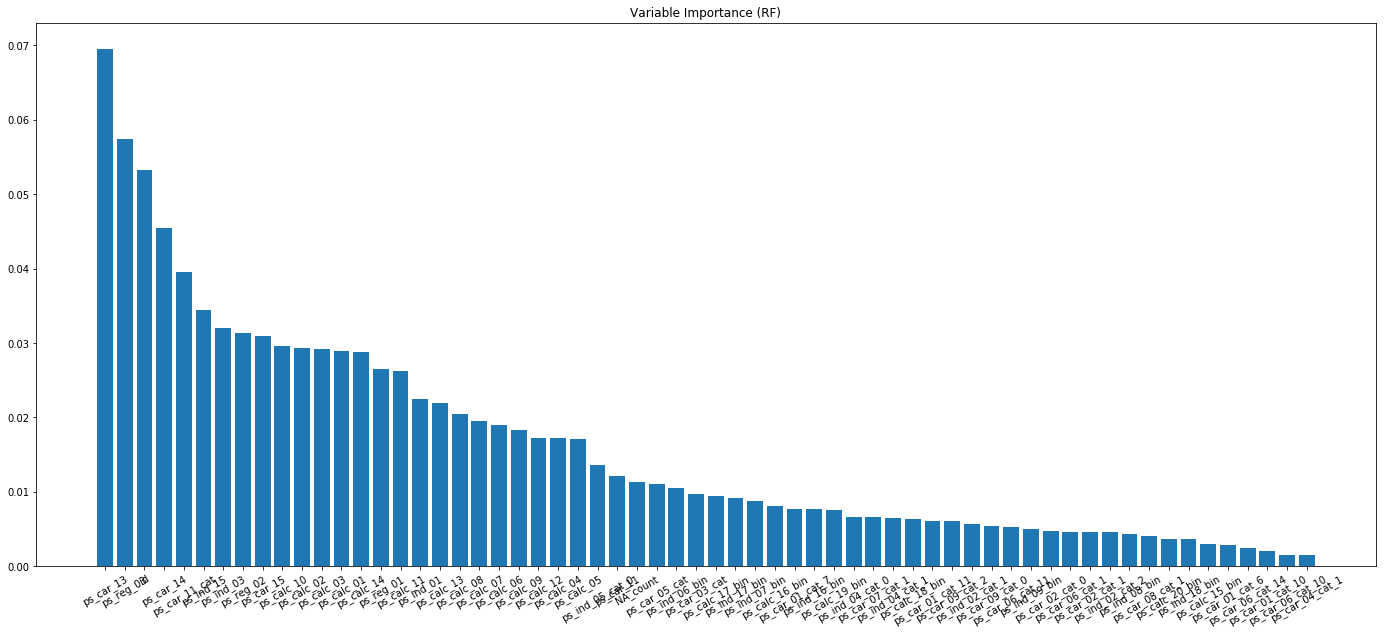

In [256]:

plt.subplots(figsize=(24,10));
plt.bar(range(len(variable_names)),importances[indices]);
plt.xticks(range(len(variable_names)),variable_names,rotation=30);
plt.title("Variable Importance (RF)")
plt.show();

### Ensemble Modelling ( rf+XGB+LightGBM )

In [206]:
# all_model_result_train=pd.DataFrame({'RF':train_rf_prob,'XGB':train_xgb_prob,'L_GBM':train_lgbm_prob,\
#                                    'target':clean_data[clean_data['data']=='train']['target']})


all_model_result_val=pd.DataFrame({'RF':val_rf_prob,'XGB':val_xgb_prob,'L_GBM':val_lgbm_prob,\
                                   'target':clean_data[clean_data['data']=='val']['target']})


all_model_result_test=pd.DataFrame({'RF':test_rf_prob,'XGB':test_xgb_prob,'L_GBM':test_lgbm_prob})

In [207]:
all_model_result_val.head()

,RF,XGB,L_GBM,target
357127,0.456794,0.111837,0.111837,0
357128,0.311828,0.100320,0.100320,0
357129,0.276995,0.088488,0.088488,0
357130,0.264089,0.086357,0.086357,0
357131,0.334903,0.103881,0.103881,0


#### Logistic Regression

In [208]:
logit=LogisticRegression()
logit.fit(all_model_result_val[['RF','XGB','L_GBM']],all_model_result_val['target'])
val_prob=logit.predict_proba(all_model_result_val[['RF','XGB','L_GBM']])
test_prob=logit.predict_proba(all_model_result_test)

In [209]:
printScore(np.where(val_prob[:,1]>0.05,1,0),clean_data[clean_data['data']=='val']['target'])

{'auc': 0.5715891817565331,
 'accuracy': 0.8265283407186509,
 'precision': 0.06776566469093988,
 'recall': 0.2967211215386398,
 'f1': 0.11033323998879864,
 'pr_auc_score': 0.19499094125936006}

In [210]:
submission_results={'id':test['id'],'target':test_prob[:,1]}
submission_file=pd.DataFrame(submission_results)
submission_file.to_csv("result_ensemble.csv",index=False)

#### Average Probs of the 3

In [211]:
submission_avg={'id':test['id'],'target':(test_rf_prob+test_xgb_prob+test_lgbm_prob)/3}
submission_file=pd.DataFrame(submission_avg)
submission_file.to_csv("result_ensemble_avg.csv",index=False)